In [17]:
from typing import Union, List
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np

In [18]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"

In [19]:
class Tree:
    def __init__(self, num_rows):
        self.num_rows = num_rows
        self.rows = []
        self.generate()
 
    def generate(self):
        for i in range(self.num_rows):
            row = []
            for j in range(2**i, 2**(i+1)):
                if j % 2 is 1:
                    node = Node(j)
                    row.append(node)
            self.rows.append(row)
   
    def getNode(self, label):
        row = Node.getRow(label)
        return self.rows[row][(label-(2**row+1))//2]
 
    def getGeom(self) -> Union[List[int], List[int], List[str]]:
        arr_x = []
        arr_y = []
        arr_colors = []
        for i, row in enumerate(self.rows):
            for j, node in enumerate(row):
                row_half = len(row) / 2
                x = 0.5 if (row_half < 1) else j-row_half+1
                arr_x.append(x)
                arr_y.append(i)
                color = "orange" if node.marked else "black"
                arr_colors.append(color)
                if node.marked == False:
                    rowIsMarked = False
        return arr_x, arr_y, arr_colors
   
    def mark(self, label):
        self.getNode(label).marked = True

    def checkRowMarked(self) -> int:
        for i, row in enumerate(reversed(self.rows)):
            rowIsMarked = True
            for node in row:
                if node.marked == False:
                    rowIsMarked = False
                    break
            if rowIsMarked == True:
                return i
        return -1
   
    def countMarkedNodesAboveRow(self, row) -> int:
        cnt = 0
        for row in self.rows[row+1:]:
            for node in row:
                if node.marked == True:
                    cnt += 1
        return cnt
 
class Node:
    def __init__(self, label):
        self.tree = None
        self.row = Node.getRow(label)
        self.marked = False
        self.label = label
   
    @staticmethod
    def getRow(label: int) -> int:
        return int(math.log(label,2))
 
    def setTree(self, tree: Tree):
        self.tree = tree
 
    @staticmethod
    def getType(label):
        if (label + 1) % 3 == 0:
            if ((label-1)/4)%2 == 0:
                return 4
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

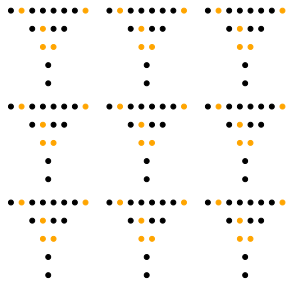

In [20]:
tree = Tree(5)
 
tree.mark(5)
tree.mark(7)
 
tree.mark(11)
tree.mark(19)
tree.mark(31)
 
#for row in tree.rows:
#    for node in row:
#        print("{0}-{1}".format(node.label, 'T' if node.marked else 'F'), end =" ")
#    print('\n')
 
#markedRow = tree.checkRowMarked()
#print(markedRow)
#print(tree.countMarkedNodesAboveRow(markedRow))
 
x, y, colors = tree.getGeom()
plt.figure(figsize=(5, 5))
 
plt.subplot(331)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(332)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(333)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(334)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(335)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(336)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(337)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(338)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.subplot(339)
plt.axis('off')
plt.scatter(x, y, s=24, c=colors)
plt.show()
